In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from scipy.stats import zscore

Importiamo il nostro file "dataset_climatico"

In [2]:
try:
    data = pd.read_csv('dataset_climatico.csv')
except FileNotFoundError:
    print("File dataset_climatico.csv non trovato.")
    sys.exit()

Mostriamo le prime 10 righe del dataset

In [3]:
data.head(10)

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,3.345032,16.712921,66.028263,75.580829,Stazione Napoli
1,2022-01-02,34.640506,9.669180,52.891332,22.567745,Stazione Roma
2,2022-01-03,1.223902,17.623765,82.054851,59.792104,Stazione Milano
3,2022-01-04,-5.234223,18.328380,48.785933,2.510954,Stazione Milano
4,2022-01-05,32.792867,5.431022,64.595705,83.449843,Stazione Milano
5,2022-01-06,0.503911,12.150907,55.594284,18.744475,Stazione Roma
6,2022-01-07,21.039572,10.531681,82.575716,0.476838,Stazione Roma
7,2022-01-08,-7.373964,10.758916,45.235000,30.118781,Stazione Milano
8,2022-01-09,22.881909,18.753262,34.728142,92.048712,Stazione Napoli
9,2022-01-10,29.677410,6.103774,74.919343,26.261422,Stazione Napoli


Verifichiamo che nel dataset non ci siano valori nan

In [4]:
data.isna().sum()

data_osservazione         0
temperatura_media         0
precipitazioni            0
umidita                   0
velocita_vento            0
stazione_meteorologica    0
dtype: int64

Calcoliamo le statistiche descrittive (media, mediana, deviazione standard) per ogni variabile.

In [5]:
data.describe().T[['mean', '50%', 'std']]

,mean,50%,std
temperatura_media,12.611352,12.102023,13.285324
precipitazioni,10.156891,10.268888,5.848920
umidita,60.440853,59.888175,17.247891
velocita_vento,47.614261,46.657152,28.398370


Trasformiamo la colonna data_osservazione da str a datetime

In [6]:
data["data_osservazione"] = pd.to_datetime(data["data_osservazione"])

Realizziamo gli istogrammi per le variabili: temperatura media, precipitazioni, umidità e velocità del vento.

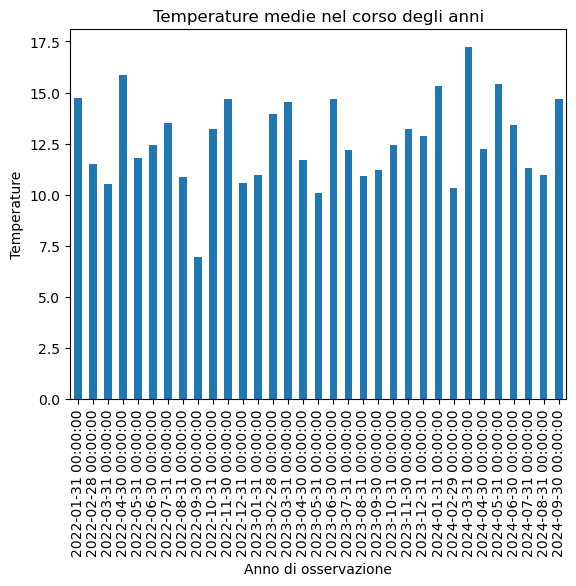

In [7]:
data.set_index("data_osservazione", inplace=True) 
data.resample("M")["temperatura_media"].mean().plot(kind="bar") 
plt.title("Temperature medie nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Temperature") 
plt.show()

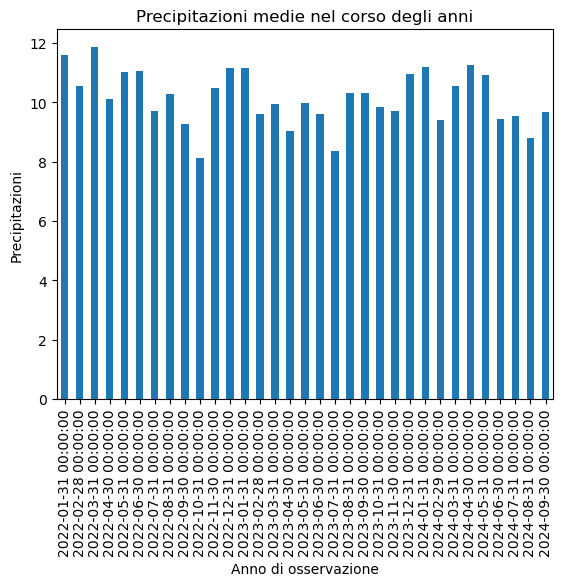

In [8]:
data.resample("M")["precipitazioni"].mean().plot(kind="bar") 
plt.title("Precipitazioni medie nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Precipitazioni") 
plt.show()

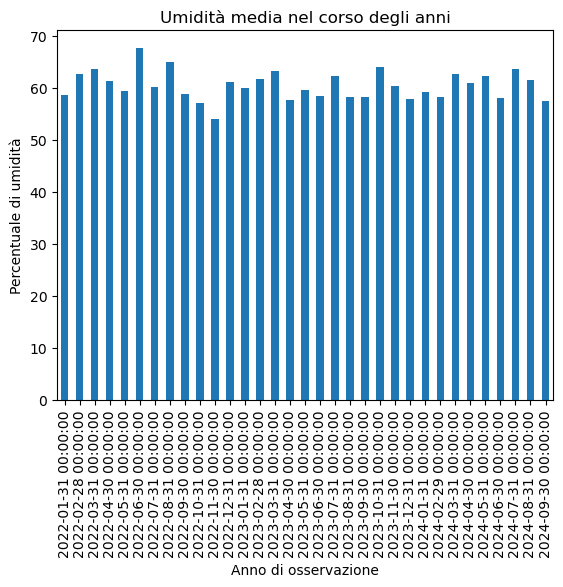

In [9]:
data.resample("M")["umidita"].mean().plot(kind="bar") 
plt.title("Umidità media nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Percentuale di umidità") 
plt.show()

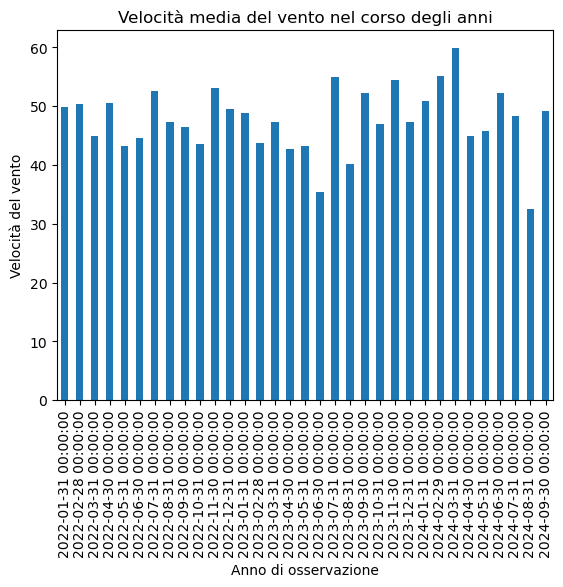

In [10]:
data.resample("M")["velocita_vento"].mean().plot(kind="bar") 
plt.title("Velocità media del vento nel corso degli anni") 
plt.xlabel("Anno di osservazione") 
plt.ylabel("Velocità del vento") 
plt.show()

Realizziamo i boxplot per le variabili: temperatura media, precipitazioni, umidità e velocità del vento.

Text(0, 0.5, 'Temperatura')

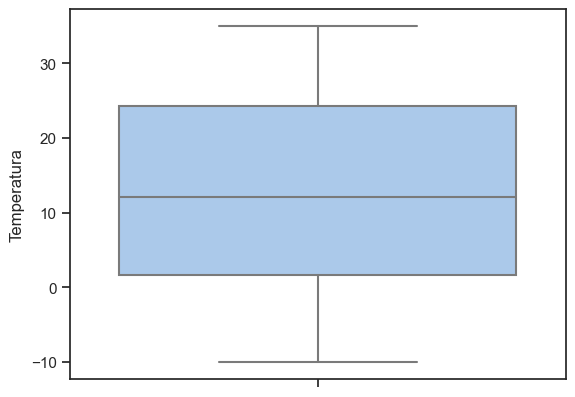

In [11]:
#boxplot temperatura
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='temperatura_media')
plt.ylabel('Temperatura')

Text(0, 0.5, 'Precipitazioni')

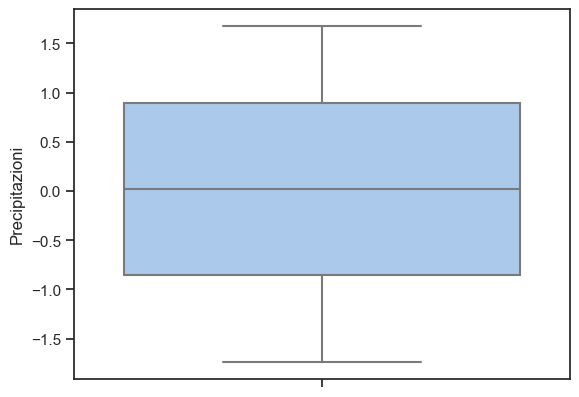

In [18]:
#boxplot precipitazioni
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='precipitazioni')
plt.ylabel('Precipitazioni')

Text(0, 0.5, 'Umidità')

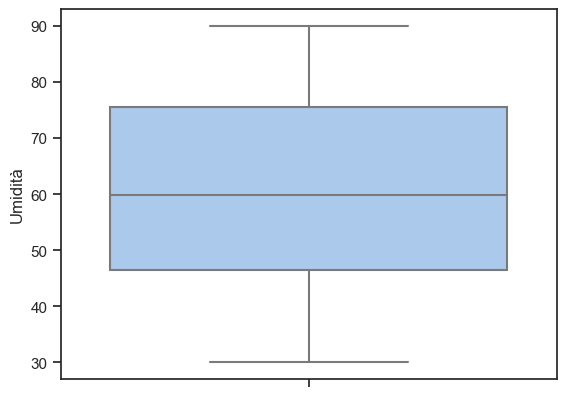

In [13]:
#boxplot umidità
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='umidita')
plt.ylabel('Umidità')

Text(0, 0.5, 'Velocità vento')

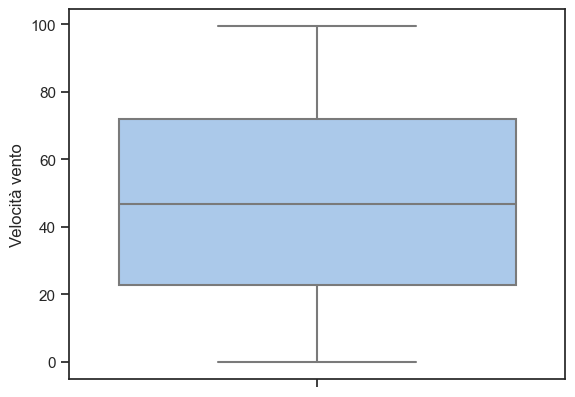

In [14]:
#boxplot velocità vento
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, y='velocita_vento')
plt.ylabel('Velocità vento')

Applichiamo la normalizzazione Z-score a temperatura media, precipitazioni, umidità e velocità vento per standardizzarle.

In [15]:
cols_to_normalize = ['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']
data[cols_to_normalize] = data[cols_to_normalize].apply(zscore)
data[cols_to_normalize]

,temperatura_media,precipitazioni,umidita,velocita_vento
data_osservazione,,,,
2022-01-01,-0.697834,1.121457,0.324110,0.985288
2022-01-02,1.658987,-0.083426,-0.437926,-0.882412
2022-01-03,-0.857574,1.277263,1.253766,0.429036
2022-01-04,-1.343927,1.397793,-0.676068,-1.589030
2022-01-05,1.519844,-0.808394,0.241011,1.262520
...,...,...,...,...
2024-09-22,-1.350427,0.842443,1.321329,-0.132700
2024-09-23,1.373938,0.722657,-0.161716,-0.701789
2024-09-24,0.700065,0.176962,-0.981245,1.679376


Utilizziamo una heatmap per visualizzare la correlazione tra le diverse variabili meteorologiche.

In [16]:
# heatmap
matrix = data[['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']].corr()
matrix

,temperatura_media,precipitazioni,umidita,velocita_vento
temperatura_media,1.000000,-0.003993,-0.052520,-0.021765
precipitazioni,-0.003993,1.000000,0.026664,-0.001567
umidita,-0.052520,0.026664,1.000000,0.055076
velocita_vento,-0.021765,-0.001567,0.055076,1.000000


<Axes: >

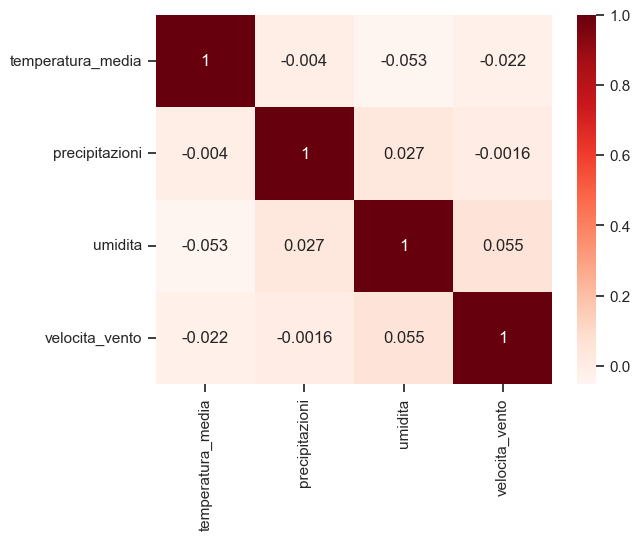

In [17]:
sns.heatmap(matrix, cmap="Reds", annot=True)

## Conclusioni
Da quello che si evince da quest'ultimo grafico non ci sono correlazioni significative tra nessuna delle variabili considerate. Come possiamo notare tutti i valori sono molto vicini allo 0, ciò denota un'indipendenza tra le variabili in esame. 